[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/6.2%20%EB%B3%80%EB%8F%99%EC%84%B1%20%EC%A7%80%ED%91%9C%20%EB%B3%BC%EB%A6%B0%EC%A0%80%20%EB%B0%B4%EB%93%9C-output.ipynb)


## 볼린저 밴드

볼린저 밴드(Bollinger Bands)는 1980년대 존 볼린저가 개발하고 2011년 상표권 취득한 주가 기술적 분석 도구이다. 트레이딩 밴드 개념에서 발전된 볼린저 밴드와 상대지표 그리고 대역폭은 이전 거래와의 상대적 가격의 높음과 낮음을 판단하는 데 사용된다. 볼린저 밴드는 켈트너 채널과 비슷한 변동성 지표이다. 볼린저 밴드는 주가가 이동평균선 중심으로 표준편차 범위 안에서 움직인다는 전제로 개발되었다.


볼린저 밴드는 다음과 같이 구성된다.
* N기간 동안의 이동평균(MA)
* 이동평균 위의 K배 표준편차 상위 밴드
* 이동평균 아래의 K배 표준편차 하위 밴드

일반적으로 N과 K의 값은 20과 2이다. 평균값의 기본 선택의 단순 이동 평균이지만, 필요에 따라 다른 종류의 평균값을 쓸 수 있다. 지수 이동 평균(Exponential moving averages)은 일반적인 대안이다. 대개 중간 밴드와 표준 편차의 계산을 위해 같은 기간을 사용한다.



* 출처 : [볼린저 밴드 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B3%BC%EB%A6%B0%EC%A0%80_%EB%B0%B4%EB%93%9C)

https://estiate.tistory.com/entry/%EC%A3%BC%EC%8B%9D-%EC%B4%88%EB%B3%B4%EC%9E%90%EB%A5%BC-%EC%9C%84%ED%95%9C-%EB%B3%BC%EB%A6%B0%EC%A0%80%EB%B0%B4%EB%93%9C-%ED%95%B4%EC%84%9D%EA%B3%BC-%EC%8B%A4%EC%A0%84-%EC%A0%81%EC%9A%A9-%EB%B0%A9%EB%B2%95

## 라이브러리 로드

In [1]:
# 데이터 분석을 위해 pandas, numpy, 시각화를 위해 matplotlib 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymysql.cursors
import re

In [2]:
# 그래프 스타일 설정
plt.style.use("seaborn")

C:\Users\yujin\AppData\Local\Temp\ipykernel_21340\4282763211.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


## 개별종목 일별시세 가져오기

In [3]:
# 데이터베이스 연결
connection = pymysql.connect(host='localhost',   #데이터베이스 아이피
                             user='USER_SQLSTK',  #데이터베이스 사용자
                             password='1qaz2wsx', #데이터베이스 암호
                             database='DB_SQLSTK', #데이터베이스 이름
                             charset='utf8',       # 언어 설정 
                             cursorclass=pymysql.cursors.DictCursor # 조회결과를 dictionary로 리턴
                             )

In [4]:
connection

In [5]:
cursor = connection.cursor()

In [6]:
cursor

In [7]:
#실행할 SQL
# 2019년 1월 1일 ~ 2020년 12월 31일 삼성전자의 종가 조회
sql = """
      SELECT T1.STK_CD,T1.DT, T1.C_PRC
      FROM  HISTORY_DT T1
      WHERE T1.STK_CD = '005930'
      AND T1.DT >= str_to_date('20190101','%Y%m%d')
      AND T1.DT <= str_to_date('20201231','%Y%m%d')
"""  

In [8]:
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)

494

In [9]:
# SQL 쿼리를 실행하고 결과를 result에 저장
result = cursor.fetchall()

In [10]:
# SQL 쿼리 실행 결과 출력
result

[{'STK_CD': '005930',
  'DT': datetime.date(2019, 1, 2),
  'C_PRC': Decimal('38750.000')},
 {'STK_CD': '005930',
  'DT': datetime.date(2019, 1, 3),
  'C_PRC': Decimal('37600.000')},
 {'STK_CD': '005930',
  'DT': datetime.date(2019, 1, 4),
  'C_PRC': Decimal('37450.000')},
 {'STK_CD': '005930',
  'DT': datetime.date(2019, 1, 7),
  'C_PRC': Decimal('38750.000')},
 {'STK_CD': '005930',
  'DT': datetime.date(2019, 1, 8),
  'C_PRC': Decimal('38100.000')},
 {'STK_CD': '005930',
  'DT': datetime.date(2019, 1, 9),
  'C_PRC': Decimal('39600.000')},
 {'STK_CD': '005930',
  'DT': datetime.date(2019, 1, 10),
  'C_PRC': Decimal('39800.000')},
 {'STK_CD': '005930',
  'DT': datetime.date(2019, 1, 11),
  'C_PRC': Decimal('40500.000')},
 {'STK_CD': '005930',
  'DT': datetime.date(2019, 1, 14),
  'C_PRC': Decimal('40050.000')},
 {'STK_CD': '005930',
  'DT': datetime.date(2019, 1, 15),
  'C_PRC': Decimal('41100.000')},
 {'STK_CD': '005930',
  'DT': datetime.date(2019, 1, 16),
  'C_PRC': Decimal('41450.00

In [11]:
# result를 DataFrame으로 변환
df = pd.DataFrame(result)

In [12]:
df

,STK_CD,DT,C_PRC
0,005930,2019-01-02,38750.000
1,005930,2019-01-03,37600.000
2,005930,2019-01-04,37450.000
3,005930,2019-01-07,38750.000
4,005930,2019-01-08,38100.000
...,...,...,...
489,005930,2020-12-23,73900.000
490,005930,2020-12-24,77800.000
491,005930,2020-12-28,78700.000
492,005930,2020-12-29,78300.000


In [13]:
#조회한 컬럼 정보 조회
cursor.description

(('STK_CD', 253, None, 40, 40, 0, False),
 ('DT', 10, None, 10, 10, 0, False),
 ('C_PRC', 246, None, 20, 20, 3, True))

In [14]:
#조회한 컬럼의 정보를 desc에 저장
desc = cursor.description

In [15]:
desc

(('STK_CD', 253, None, 40, 40, 0, False),
 ('DT', 10, None, 10, 10, 0, False),
 ('C_PRC', 246, None, 20, 20, 3, True))

In [16]:
#리스트의 행 열 방향을 반대로 바꿈
list( zip(*desc) )

[('STK_CD', 'DT', 'C_PRC'),
 (253, 10, 246),
 (None, None, None),
 (40, 10, 20),
 (40, 10, 20),
 (0, 0, 3),
 (False, False, True)]

In [17]:
#리스트의 0번째 열 리턴 => 조회한 컬럼 이름
list( zip(*desc) )[0]

('STK_CD', 'DT', 'C_PRC')

In [18]:
#조회한 컬럼 이름을 column_name 에 대입
column_name = list( zip(*desc) )[0]

In [19]:
column_name

('STK_CD', 'DT', 'C_PRC')

In [20]:
# for element in column_name : column_name에서 컬럼 이름 1개를 element에 대입
#element.upper() : 컬럼 이름 1개가 저장된 element를 대문자로 변환해서 리턴

[element.upper() for element in column_name]

['STK_CD', 'DT', 'C_PRC']

In [21]:
# for element in column_name : column_name에서 컬럼 이름 1개를 element에 대입
#element.upper() : 컬럼 이름 1개가 저장된 element를 대문자로 변환해서 리턴
#대문자로 변환한 컬럼 이름을 column_name에 대입

column_name = [element.upper() for element in column_name]

In [22]:
column_name

['STK_CD', 'DT', 'C_PRC']

In [23]:
#re.sub() : 특정 문자를 찾아서 삭제
#\S : 문자열
#\. : .
# .앞의 문자열 찾아서 삭제

# T3.FIN_ITM_VAL -> FIN_ITM_VAL 으로 변환

re.sub('\S*\.',"","T3.FIN_ITM_VAL" ) 

'FIN_ITM_VAL'

In [24]:
#re.sub() : 특정 문자를 찾아서 삭제
#\S : 문자열
#\. : .
# .앞의 문자열 찾아서 삭제

# 컬럼 이름에 . 앞의 문자열 삭제

column_name = [re.sub('\S*\.',"",element)  for element in column_name]

In [25]:
column_name

['STK_CD', 'DT', 'C_PRC']

In [26]:
df.columns = column_name

In [27]:
df

,STK_CD,DT,C_PRC
0,005930,2019-01-02,38750.000
1,005930,2019-01-03,37600.000
2,005930,2019-01-04,37450.000
3,005930,2019-01-07,38750.000
4,005930,2019-01-08,38100.000
...,...,...,...
489,005930,2020-12-23,73900.000
490,005930,2020-12-24,77800.000
491,005930,2020-12-28,78700.000
492,005930,2020-12-29,78300.000


In [28]:
# df의 컬럼 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STK_CD  494 non-null    object
 1   DT      494 non-null    object
 2   C_PRC   494 non-null    object
dtypes: object(3)
memory usage: 11.7+ KB


In [29]:
df

,STK_CD,DT,C_PRC
0,005930,2019-01-02,38750.000
1,005930,2019-01-03,37600.000
2,005930,2019-01-04,37450.000
3,005930,2019-01-07,38750.000
4,005930,2019-01-08,38100.000
...,...,...,...
489,005930,2020-12-23,73900.000
490,005930,2020-12-24,77800.000
491,005930,2020-12-28,78700.000
492,005930,2020-12-29,78300.000


In [30]:
# DT 컬럼의 타입을 날짜와 시간으로 변환
df["DT"] = pd.to_datetime (df["DT"])

In [31]:
# C_PRC 컬럼의 타입을 정수로 변환
df.loc[: , "C_PRC" ] = df.loc[: , "C_PRC" ].astype("int64")

In [32]:
# df의 컬럼 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   STK_CD  494 non-null    object        
 1   DT      494 non-null    datetime64[ns]
 2   C_PRC   494 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 11.7+ KB


## 분산과 표준편차

* [Pandas Bollinger Bands 예제](https://pandas.pydata.org/docs/user_guide/visualization.html#plotting-directly-with-matplotlib)

* 표준편차
    * 표준 편차(標準 偏差, 영어: standard deviation)는 자료의 산포도를 나타내는 수치로, 분산의 양의 제곱근으로 정의된다. 표준편차가 작을수록 평균값에서 변량들의 거리가 가깝다. 통계학과 확률에서 주로 확률의 분포, 확률변수 혹은 측정된 인구나 중복집합에 적용된다. 관례에 따라 모집단은 그리스문자로 표본은 영어 알파벳으로 표기하는데, 모집단의 표준편차는 σ(시그마)로, 표본의 표준편차는 s(에스)로 나타낸다
    * 편차(deviation)는 관측값에서 평균 또는 중앙값을 뺀 것이다.
    * 분산(variance)은 관측값에서 평균을 뺀 값을 제곱하고, 그것을 모두 더한 후 전체 개수로 나눠서 구한다. 즉, 차이값의 제곱의 평균이다. 관측값에서 평균을 뺀 값인 편차를 모두 더하면 0이 나오므로 제곱해서 더한다.
    * 표준 편차(standard deviation)는 분산을 제곱근한 것이다. 편차들(deviations)의 제곱합(SS, sum of square)에서 얻어진 값의 평균치인 분산의 성질로 부터 다시 제곱근해서 원래 단위로 만들어줌으로써 얻게된다.

* 출처 : [표준 편차 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%91%9C%EC%A4%80_%ED%8E%B8%EC%B0%A8)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/700px-Standard_deviation_diagram.svg.png" width="500">


* 통계학에서 68-95-99.7 규칙(영어: 68-95-99.7 rule)은 정규 분포를 나타내는 규칙으로, 경험적인 규칙(empirical rule)이라고도 한다. 3시그마 규칙(three-sigma rule)이라고도 하는데 이 때는 평균에서 양쪽으로 3표준편차의 범위에 거의 모든 값들(99.7%)이 들어간다는 것을 나타낸다.

* 약 68%의 값들이 평균에서 양쪽으로 1 표준편차 범위(μ±σ)에 존재한다.
* **약 95%의 값들이 평균에서 양쪽으로 2 표준편차 범위(μ±2σ)에 존재한다.**
* 거의 모든 값들(실제로는 99.7%)이 평균에서 양쪽으로 3표준편차 범위(μ±3σ)에 존재한다.

* 출처 : [68-95-99.7 규칙 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/68-95-99.7_%EA%B7%9C%EC%B9%99)

In [33]:
# 종가의 기술 통계 값
df["C_PRC"].describe()

count       494
unique      264
top       59000
freq          7
Name: C_PRC, dtype: int64

In [34]:
# 종가 분산
df["C_PRC"].var()

60058949.996304534

In [35]:
# 표준편차 == 분산에 루트 
# np.sqrt() : 루트 계산
# 분산에 루트를 계산하면 표준편차
np.sqrt(df["C_PRC"].var())

7749.770964119168

In [36]:
# 분산에 0.5 승을 해도 표준편차
df["C_PRC"].var() ** 0.5

7749.770964119168

In [37]:
# 종가의 표준편차
df["C_PRC"].std()

7749.770964119168

In [38]:
df

,STK_CD,DT,C_PRC
0,005930,2019-01-02,38750
1,005930,2019-01-03,37600
2,005930,2019-01-04,37450
3,005930,2019-01-07,38750
4,005930,2019-01-08,38100
...,...,...,...
489,005930,2020-12-23,73900
490,005930,2020-12-24,77800
491,005930,2020-12-28,78700
492,005930,2020-12-29,78300


## 20일간 종가 이동평균과 표준편차

** 이동평균 : https://www.cmegroup.com/ko/education/learn-about-trading/courses/technical-analysis/understanding-moving-averages.html#

In [39]:
# 20일간 종가의 이동평균

# rolling(20).mean() : 20일간의 이동 평균을 계산하는 함수
df["MA20"] = df["C_PRC"].rolling(20).mean()

In [40]:
df.head(50)

,STK_CD,DT,C_PRC,MA20
0,005930,2019-01-02,38750,NaN
1,005930,2019-01-03,37600,NaN
2,005930,2019-01-04,37450,NaN
3,005930,2019-01-07,38750,NaN
4,005930,2019-01-08,38100,NaN
5,005930,2019-01-09,39600,NaN
6,005930,2019-01-10,39800,NaN
7,005930,2019-01-11,40500,NaN
8,005930,2019-01-14,40050,NaN
9,005930,2019-01-15,41100,NaN


In [41]:
# 20일간 주가의 표준편차
df["stddev"] = df["C_PRC"].rolling(20).std()

In [42]:
df.head(50)

,STK_CD,DT,C_PRC,MA20,stddev
0,005930,2019-01-02,38750,NaN,NaN
1,005930,2019-01-03,37600,NaN,NaN
2,005930,2019-01-04,37450,NaN,NaN
3,005930,2019-01-07,38750,NaN,NaN
4,005930,2019-01-08,38100,NaN,NaN
5,005930,2019-01-09,39600,NaN,NaN
6,005930,2019-01-10,39800,NaN,NaN
7,005930,2019-01-11,40500,NaN,NaN
8,005930,2019-01-14,40050,NaN,NaN
9,005930,2019-01-15,41100,NaN,NaN


In [43]:
# 상위 밴드
# UpperB = 종가의 이동평균 + (표준편차 * 2)
df["UpperB"] = df["MA20"] + (df["stddev"] * 2)

In [44]:
# 하위밴드
# LowerB = 종가의 이동평균 - (표준편차 * 2)
df["LowerB"] = df["MA20"] - (df["stddev"] * 2)

In [45]:
df

,STK_CD,DT,C_PRC,MA20,stddev,UpperB,LowerB
0,005930,2019-01-02,38750,NaN,NaN,NaN,NaN
1,005930,2019-01-03,37600,NaN,NaN,NaN,NaN
2,005930,2019-01-04,37450,NaN,NaN,NaN,NaN
3,005930,2019-01-07,38750,NaN,NaN,NaN,NaN
4,005930,2019-01-08,38100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
489,005930,2020-12-23,73900,71655.0,2405.798915,76466.597831,66843.402169
490,005930,2020-12-24,77800,72145.0,2611.407163,77367.814325,66922.185675
491,005930,2020-12-28,78700,72670.0,2823.417116,78316.834232,67023.165768
492,005930,2020-12-29,78300,73250.0,2722.131518,78694.263036,67805.736964


## pyplot을 통한 볼린저 밴드 시각화

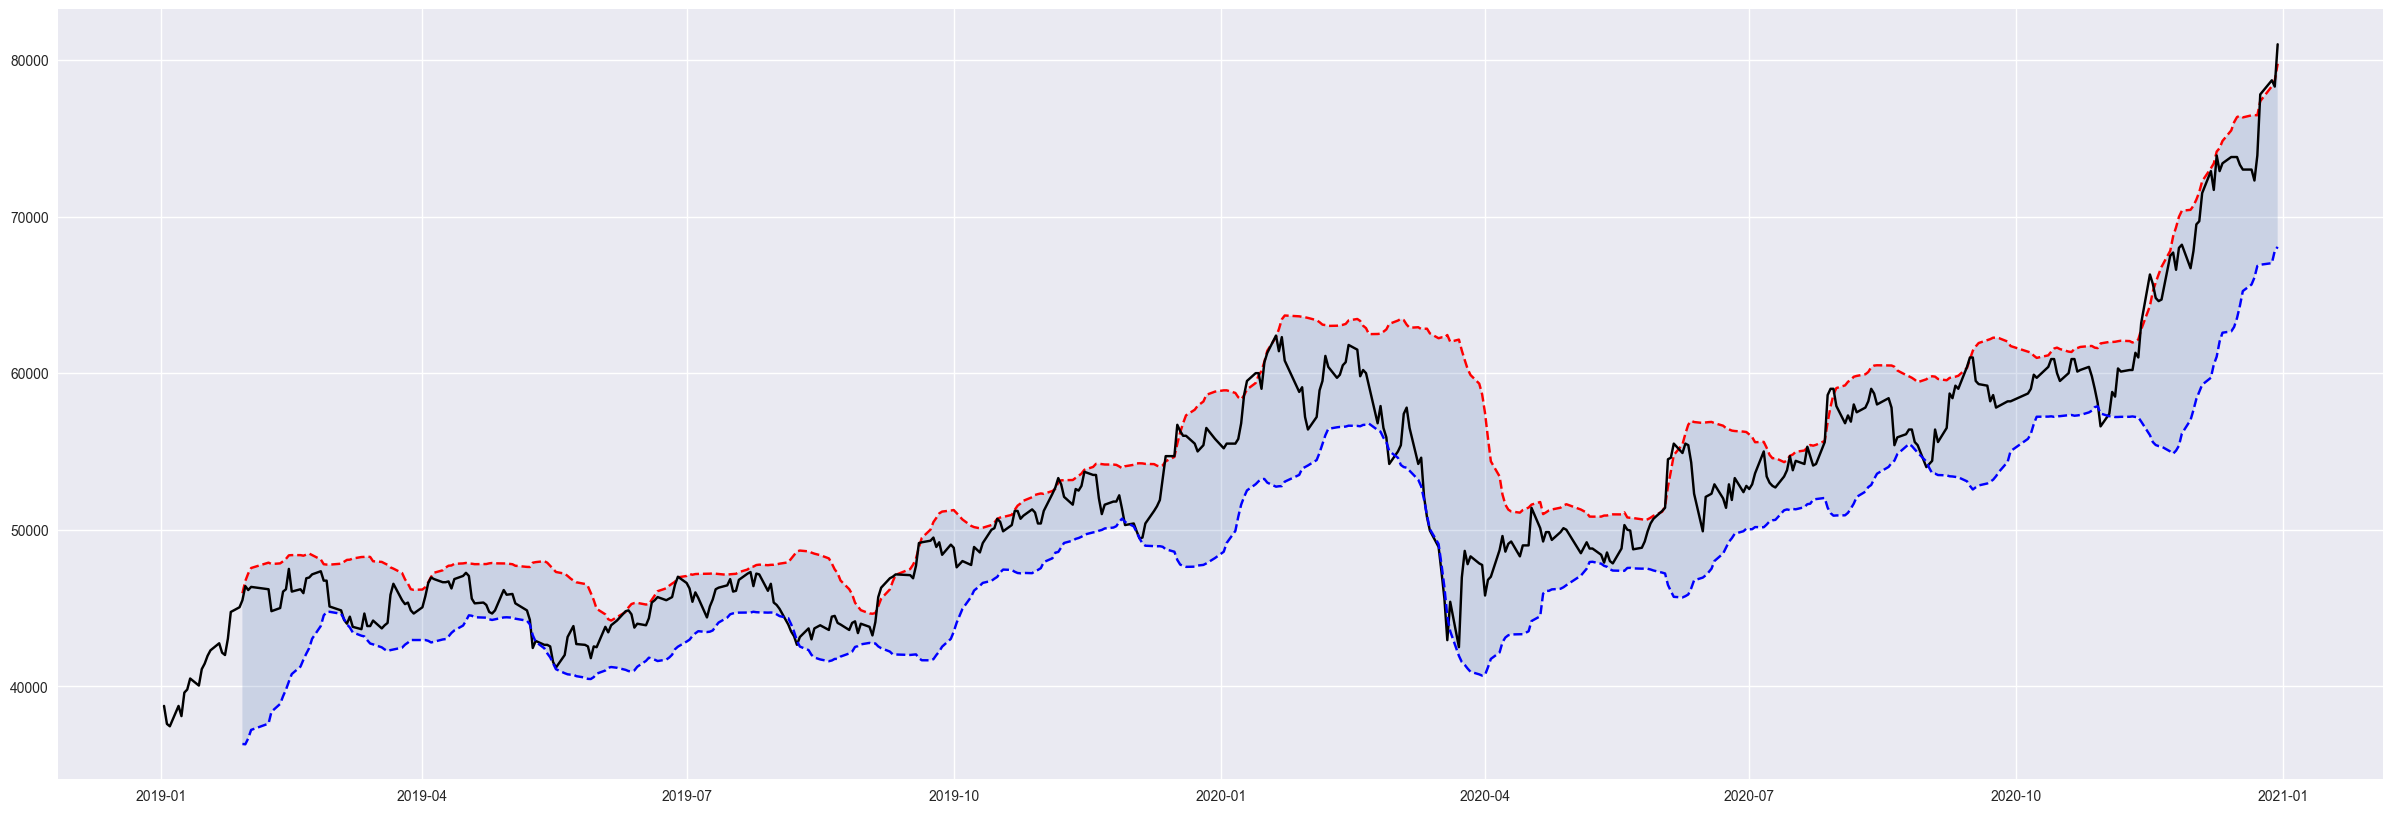

In [46]:
# pyplot을 통해 볼린저밴드를 시각화 합니다.

# 그래프의 크기 가로 30 세로 10
plt.figure(figsize=(30, 10))
# 상위 밴드 : 주식의 가격이 움직이는 밴드의 상위값 (빨강색으로 표시)
plt.plot(df.DT, df.UpperB, "r--")
# 실제 주식의 가격 (종가) : 검정색
plt.plot(df.DT, df.C_PRC, "k")
# 하위밴드 : 주식이 움직이는 가격이 움직이는 밴드의 하위값 (하위값)
plt.plot(df.DT, df.LowerB, "b--")

# 각 날짜의 df.LowerB(하위밴드) ~ df.UpperB (상위밴드) 사이를 색을 칠함
plt.fill_between(df.DT, df.LowerB, df.UpperB, alpha=0.2)

## %밴드
* %밴드를 통해 추세가 아닌 **주가의 상대적인 위치**를 파악할 수 있습니다.
* 0 보다 작거나 1보다 큰 구간은 밴드의 범위를 벗어난 구간으로 볼 수 있습니다.

In [47]:
# PercentB = (종가 - 하위밴드) / (상위밴드 - 하위밴드)
df["PercentB"] = (df["C_PRC"] - df["LowerB"]) / (df["UpperB"] - df["LowerB"])

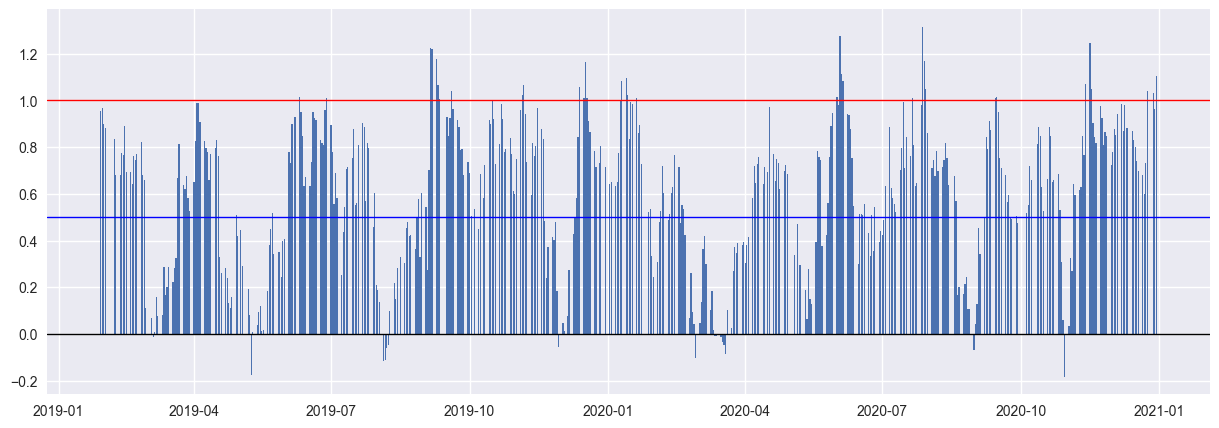

In [48]:
# 밴드 내에서 주가의 상대적인 위치를 시각화 합니다.
# 1보다 크면 밴드폭 상단을 돌파한 것이고
# 0보다 작으면 밴드폭 하단을 뚫고 내려간 것입니다.

# 그래프의 크기 가로 15 세로 5
plt.figure(figsize=(15, 5))
# 밴드내에서 주가의 상대 위치를 막대 그래프로 출력
plt.bar(df.DT, df["PercentB"])

# 1 지점에 선그림 (빨강색) -> 1보다 크면 밴드폭 상단을 돌파한 것이고
plt.axhline(1, c="r", lw=1)
# 0.5 지점에 선그림 (파랑색)
plt.axhline(0.5, c="b", lw=1)
# 0 지점에 선그림 (검정색) -> 0보다 작으면 밴드폭 하단을 뚫고 내려간 것입니다.
plt.axhline(0, c="k", lw=1)